Usual python libraries like PIL and OpenCV will not work with geoTIFF format

In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
from PIL import Image

import os

# GDAL package

[Resource 1](https://www.gis.usu.edu/~chrisg/python/2009/lectures/ospy_slides4.pdf)

[Resource 2](http://ceholden.github.io/open-geo-tutorial/python/chapter_1_GDALDataset.html)

[Video Series 1](https://www.youtube.com/watch?v=3COTt03Rd3M&list=PLzHdTn7Pdxs6D-hURJCWMyNOyrh-51FX_)

In [2]:
# Import the Python 3 print function
from __future__ import print_function

# Import the "gdal" submodule from within the "osgeo" module
from osgeo import gdal, gdalconst

# We can check which version we're running by printing the "__version__" variable
print("GDAL's version is: " + gdal.__version__)
print(gdal)

gdal.UseExceptions()    # Enable exceptions


GDAL's version is: 2.3.3
<module 'osgeo.gdal' from 'D:\\softwares\\anaconda\\lib\\site-packages\\osgeo\\gdal.py'>


In [3]:
import gc
gc.enable()

In [4]:
gc.collect()

0

In [5]:
gdal.AllRegister()

In [33]:
os.listdir()

['.git', '.ipynb_checkpoints', 'GDAL.ipynb', 'paper data', 'README.md']

In [20]:
os.path.isfile("paper data\Oceania\Images\z049066\Scenes\LC08_L1TP_049066_20200812_20200813_01_RT_p00700.tif")#\\Oceania\\Images\\Scenes\\LC08_L1TP_049066_20200812_20200813_01_RT_p00700.tif")

True

# Scenes

A single $\simeq$ 7000 X 7000 px Landsat 8 image is used to generate multiple 256 X 256 px 10 band scenes. 

In [24]:
path_image= "paper data\Oceania\Images\z049066\Scenes\LC08_L1TP_049066_20200812_20200813_01_RT_p00700.tif"

img_tif= gdal.Open(path_image, gdal.GA_ReadOnly)
print(type(img_tif)) # dataset object
print(img_tif)
img_tif= None

<class 'osgeo.gdal.Dataset'>
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000019C08CE9090> >


In [37]:
def print_detail(path):
    """
    inputs : path
    outputs : print details of the .tif file located at path
    returns : none
    """
    dataset=  gdal.Open(path, gdal.GA_ReadOnly)
    print("#"*100)

    num_bands = dataset.RasterCount
    print('Number of bands in image: {n}\n'.format(n=num_bands))

    # How many rows and columns?
    rows = dataset.RasterYSize
    cols = dataset.RasterXSize
    print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

    # Does the raster have a description or metadata?
    desc = dataset.GetDescription()
    metadata = dataset.GetMetadata()

    print('Raster description: {desc}'.format(desc=desc))
    print('Raster metadata:')
    print(metadata)
    print('\n')

    # What driver was used to open the raster?
    driver = dataset.GetDriver()
    print('Raster driver short name: {d}\n'.format(d=driver.ShortName))
    print('Raster driver long name: {d}\n'.format(d=driver.LongName))

    # What is the raster's projection?
    proj = dataset.GetProjection()
    print('Image projection:')
    print(proj + '\n')

    # What is the raster's "geo-transform"
    gt = dataset.GetGeoTransform()
    print('Image geo-transform: {gt}\n'.format(gt=gt))
    print("Origin = ({}, {})".format(gt[0], gt[3]))
    print("Pixel width {}, pixel height {}".format(gt[1], gt[5]))
    print("#"*100)
    dataset= None

continent= "Oceania"
scene= "z049066"
files= os.listdir(path= os.path.join("paper data", continent, "Images", scene, "Scenes"))
# some scenes have multiple 10 band 256 X 256 files

path_images= [os.path.join("paper data", continent, "Images", scene, "Scenes", file) \
              for file in files if file.endswith(".tif")]
path_images
for _ in path_images:
    print_detail(_)
    


####################################################################################################
Number of bands in image: 10

Image size is: 256 rows x 256 columns

Raster description: paper data\Oceania\Images\z049066\Scenes\LC08_L1TP_049066_20200812_20200813_01_RT_p00637.tif
Raster metadata:
{'AREA_OR_POINT': 'Area'}


Raster driver short name: GTiff

Raster driver long name: GeoTIFF

Image projection:
PROJCS["WGS 84 / UTM zone 7N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-141],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32607"]]

Image geo-transform: (586185.0, 30.0, 0.0, -966165.0, 0.0, -30.0)

Origin = (5861

In [38]:
img_tif= gdal.Open(path_image, gdal.GA_ReadOnly)
red = img_tif.GetRasterBand(4) # getting the red band data #4
print(red)

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x0000019C0AB928D0> >


In [39]:
def print_band_stats(band_min, band_max, band_mean, band_stddev):
    """
    Arguments
    band_min 
    band_max
    band_mean
    band_stddev
    """
    print(f'Band range: {band_min} - {band_max}')
    print(f'Band mean, stddev: {band_mean}, {band_stddev}\n')

In [40]:
# What is the band's datatype?
datatype = red.DataType
print(f'Band datatype: {red.DataType}')

# If you recall from our discussion of enumerated types, this "3" we printed has a more useful definition for us to use
datatype_name = gdal.GetDataTypeName(red.DataType)
print(f'Band datatype: {datatype_name}')

# We can also ask how much space does this datatype take up
bytes = gdal.GetDataTypeSize(red.DataType)
print(f'Band datatype size: {bytes} bytes\n')

   
# How about some band statistics?
stats = red.GetStatistics(0, 1) #return (Min, Max, Mean, StdDev)
print_band_stats(*stats)

Band datatype: 2
Band datatype: UInt16
Band datatype size: 16 bytes

Band range: 6010.0 - 31826.0
Band mean, stddev: 8157.319122314453, 3140.6987683487937



In [41]:
red_data = red.ReadAsArray() # reads as a numpy array. 
# red_data = red_data.astype(float)


# for border scenes additional pixels with DN=0 are added.
# this changes the max, min, mean , std dev values
print_band_stats(red_data.min(), red_data.max(), red_data.mean(), red_data.std())

Band range: 6010 - 31826
Band mean, stddev: 8157.319122314453, 3140.6987683487937



In [43]:
def get_RGB_bands(path_image, show_stats= False):
    """
    path_image: path to the 10 band .tif file 
    show_stats : whether to print the stats of the RGB channels 
    returns
    RGB bands 256 X 256 numpy arrays in a tuple
    """
    img_tif= gdal.Open(path_image, gdal.GA_ReadOnly)
    
    
    red = img_tif.GetRasterBand(4)
    red_data = red.ReadAsArray()
    green= img_tif.GetRasterBand(3)
    green_data= green.ReadAsArray()
    blue= img_tif.GetRasterBand(2)
    blue_data= blue.ReadAsArray()

    if show_stats == True:
        print("RED ")
        print_band_stats(*red.GetStatistics(0,1))
        print("GREEN ")
        print_band_stats(*green.GetStatistics(0,1))
        print("BLUE ")
        print_band_stats(*blue.GetStatistics(0,1))
    img_tif= None
    return (red_data, green_data, blue_data)
    
_= get_RGB_bands(path_image, True)

RED 
Band range: 6010.0 - 31826.0
Band mean, stddev: 8157.3191223145, 3140.6987683488

GREEN 
Band range: 6721.0 - 30654.0
Band mean, stddev: 8940.1572723389, 2882.7569979731

BLUE 
Band range: 7937.0 - 30974.0
Band mean, stddev: 9703.7633972168, 2690.096921558



In [44]:
def normalise_band(band_arr, band_max, band_min):
    """
    takes a single channel of any range of values
    returns normalised and stretched float values in range 0.0 -1.0
    For an even brighter image we can adjust this to be in the range 0.2 -1.0
    """
    a= 1.0
    b= 0
    band_arr[(band_arr >= band_min)] = np.subtract(band_arr[(band_arr >= band_min)], band_min, casting= "unsafe")
    band_arr = np.divide(band_arr, (band_max- band_min), casting= "unsafe")
    return band_arr

In [45]:
red_data, green_data, blue_data= get_RGB_bands(path_image)

bands= np.dstack((red_data, green_data, blue_data))
maxes= [bands[:,:,0].max(), bands[:,:,1].max(), bands[:,:,2].max()]
mins= [bands[:,:,0].min(), bands[:,:,1].min(), bands[:,:,2].min()]

img= np.zeros(shape=(red_data.shape[0], red_data.shape[1], 3) , dtype= float)

for channel in range(3):
    img[:,:, channel]= normalise_band(bands[:,:,channel], maxes[channel], mins[channel])

print("DONE!")


DONE!


(256, 256, 3)


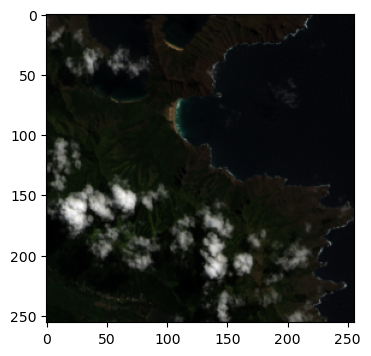

In [46]:
print(img.shape)
plt.figure(1, figsize=(4,4) )
plt.imshow(img)
plt.show()

DONE!


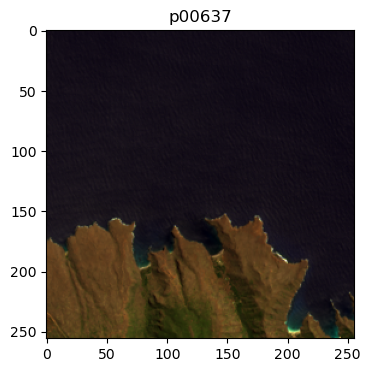

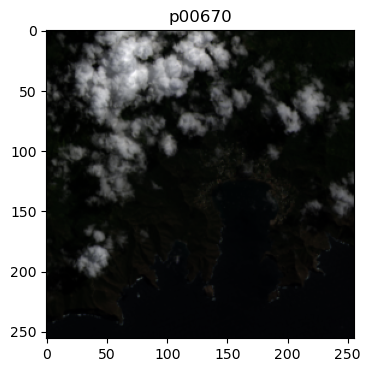

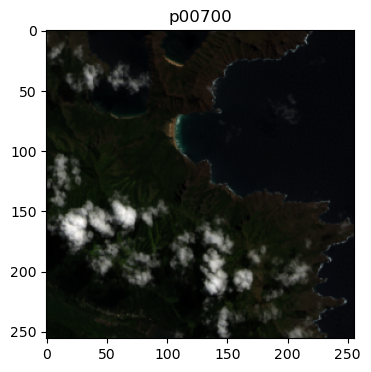

In [99]:
continent= "Oceania"
scene= "z049066"
files= os.listdir(path= os.path.join("paper data", continent, "Images", scene, "Scenes"))

path_images= [os.path.join("paper data", continent, "Images", scene, "Scenes", file) \
              for file in files if file.endswith(".tif")]

for index,path_image in enumerate(path_images):
    
    red_data, green_data, blue_data= get_RGB_bands(path_image)
    bands= np.dstack((red_data, green_data, blue_data))
    maxes= [bands[:,:,0].max(), bands[:,:,1].max(), bands[:,:,2].max()]
    mins= [bands[:,:,0].min(), bands[:,:,1].min(), bands[:,:,2].min()]

    img= np.zeros(shape=(red_data.shape[0], red_data.shape[1], 3) , dtype= float)

    for channel in range(3):
        img[:,:, channel]= normalise_band(bands[:,:,channel], maxes[channel], mins[channel])
        
    scene_index= path_image.split("\\")[-1].split("_")[-1:]
    scene_index= "_".join(scene_index)[:-4]
    plt.figure(index, figsize= (4,4) )
    plt.title(scene_index)
    plt.imshow(img)

print("DONE!")
    
    

# <center> Masks </center>

For every 256 X 256 scene in *Scenes* folder we a corresponding mask in *Masks* folder. Now this mask may be generated from any of the 3 algorithms discussed in slides.

In [57]:
continent= "Oceania"
scene= "z049066"
files= os.listdir(path= os.path.join("paper data", continent, "Images", scene, "Masks"))

path_images= [os.path.join("paper data", continent, "Images", scene, "Masks", file) \
              for file in files if file.endswith(".tif")]

for path_mask in path_images:

    print_detail(path_mask)


####################################################################################################
Number of bands in image: 1

Image size is: 256 rows x 256 columns

Raster description: paper data\Oceania\Images\z049066\Masks\LC08_L1TP_049066_20200812_20200813_01_RT_Kumar-Roy_p00637.tif
Raster metadata:
{'AREA_OR_POINT': 'Area'}


Raster driver short name: GTiff

Raster driver long name: GeoTIFF

Image projection:
PROJCS["WGS 84 / UTM zone 7N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-141],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32607"]]

Image geo-transform: (586185.0, 30.0, 0.0, -966165.0, 0.0, -30.0)

Origin

In [63]:
mask_tif= gdal.Open(path_mask, gdal.GA_ReadOnly)
mask= mask_tif.GetRasterBand(1)
print_band_stats(*mask.GetStatistics(0, 1)) 

mask_data= mask.ReadAsArray()
print("Unique DN in data mask", np.unique(mask_data))
print("No. of active fire pixels detected", np.count_nonzero(mask_data> 0))

mask_tif= None

Band range: 0.0 - 1.0
Band mean, stddev: 3.0517578125e-05, 0.0055241874336798

Unique DN in data mask [0 1]
No. of active fire pixels detected 2


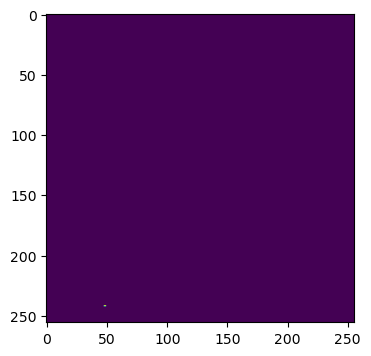

In [64]:
plt.figure(1, figsize= (4,4) )
plt.imshow(mask_data)
plt.show()

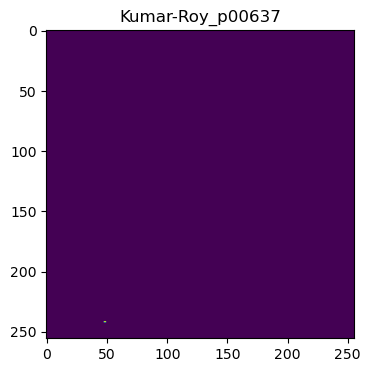

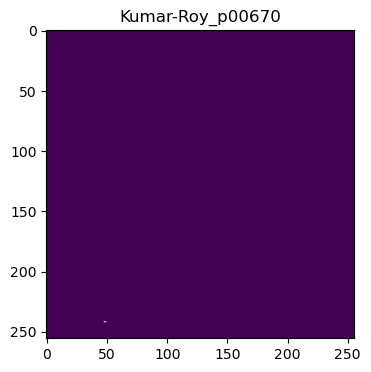

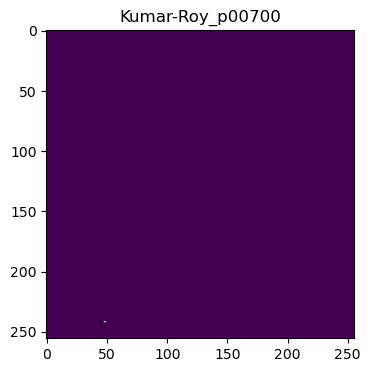

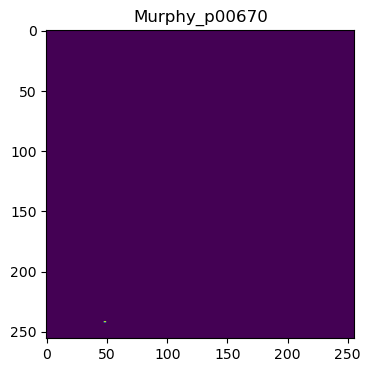

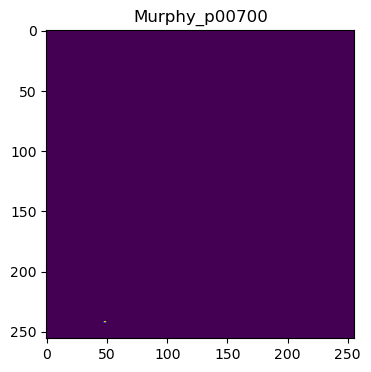

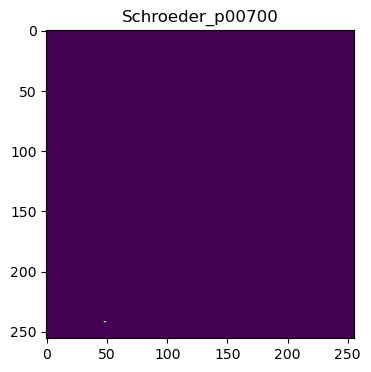

In [96]:
continent= "Oceania"
scene= "z049066"
files= os.listdir(path= os.path.join("paper data", continent, "Images", scene, "Masks"))

path_images= [os.path.join("paper data", continent, "Images", scene, "Masks", file) \
              for file in files if file.endswith(".tif")]

for index,path_image in enumerate(path_images):
    mask_tif= gdal.Open(path_mask, gdal.GA_ReadOnly)
    mask= mask_tif.GetRasterBand(1)
    mask_data= mask.ReadAsArray()
    mask= None
    
    scene_index= path_image.split("\\")[-1].split("_")[-2:]
    scene_index= "_".join(scene_index)[:-4]
    plt.figure(index, figsize= (4,4) )
    plt.title(scene_index)
    plt.imshow(mask_data)

# <center> Masks derivates </center>

From the masks generated from 3 algorithms in the *Masks* folder we can have a voting algorithm to generate new masks for each scene. We can have a simple intersection model or a weighted voting.

In [94]:
path_images= [os.path.join("paper data", continent, "Images", scene, "Masks_derivates", file) \
              for file in files if file.endswith(".tif")][0]
a= path_images.split("\\")[-1].split("_")[-2:]
print(a)
s= "_".join(a)[:-4]
print(s)

['intersection', 'p00700.tif']
intersection_p00700


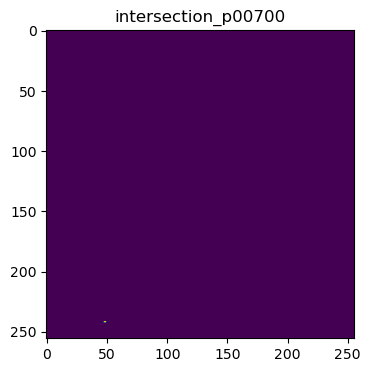

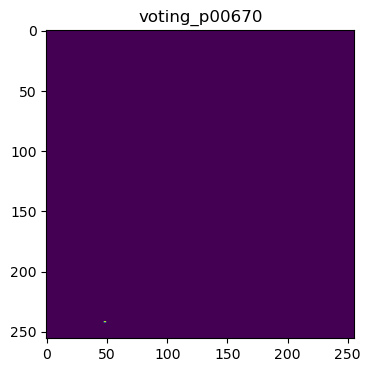

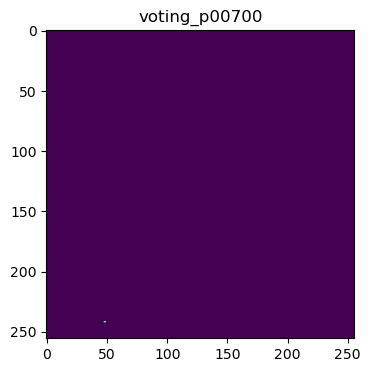

In [95]:
continent= "Oceania"
scene= "z049066"
files= os.listdir(path= os.path.join("paper data", continent, "Images", scene, "Masks_derivates"))

path_images= [os.path.join("paper data", continent, "Images", scene, "Masks_derivates", file) \
              for file in files if file.endswith(".tif")]

for index,path_image in enumerate(path_images):
    mask_tif= gdal.Open(path_mask, gdal.GA_ReadOnly)
    mask= mask_tif.GetRasterBand(1)
    mask_data= mask.ReadAsArray()
    mask= None
    
    scene_index= path_image.split("\\")[-1].split("_")[-2:]
    scene_index= "_".join(scene_index)[:-4]
    plt.figure(index, figsize= (4,4) )
    plt.title(scene_index)
    plt.imshow(mask_data)